# Normalized Cut

## Reading dataset

In [12]:
from clustering.mnist import read_MNIST_small

data = read_MNIST_small().reduce_to_percentage(0.01)
data

Reading small MNIST
Reading C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\datasets\pixels_s.csv
Reading C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\datasets\labels_s.csv


[Length: 70; Features: 784]

In [13]:
X, y = data

## Construct iteration

In [14]:
from clustering.model.clustering import NormalizedCutEvaluation

ncut_evaluation = NormalizedCutEvaluation(
    data=data,
    n_components=[2, 5, 10, 20, 30],
    hyperparameter=[5, 10, 15],
    log_=True
    #n_components=[2, 5, 10, 20, 30, 50, 100, 130, 170, 200],
    #hyperparameter=[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75]
)
ncut_evaluation

NormalizedCutEvaluation [n_components: [2, 5, 10, 20, 30], k: [5, 10, 15], not evaluated]

In [15]:
%%time
ncut_evaluation.evaluate()

Processing k: 5
  > Processed number of component: 2 [0.02075 s] 
  > Processed number of component: 5 [0.01958 s] 
  > Processed number of component: 10 [0.01495 s] 
  > Processed number of component: 20 [0.01876 s] 
  > Processed number of component: 30 [0.01894 s] 
Processing k: 10
  > Processed number of component: 2 [0.03028 s] 
  > Processed number of component: 5 [0.02467 s] 
  > Processed number of component: 10 [0.02506 s] 
  > Processed number of component: 20 [0.02520 s] 
  > Processed number of component: 30 [0.02836 s] 
Processing k: 15
  > Processed number of component: 2 [0.04216 s] 
  > Processed number of component: 5 [0.03404 s] 
  > Processed number of component: 10 [0.03572 s] 
  > Processed number of component: 20 [0.03180 s] 
  > Processed number of component: 30 [0.04317 s] 
Wall time: 594 ms


In [16]:
ncut_evaluation.best_model

NormalizedCut[N-rows: 70; N-components: 5;  Score: 0.8964803312629399, N-clusters: 15] [K: 15] 

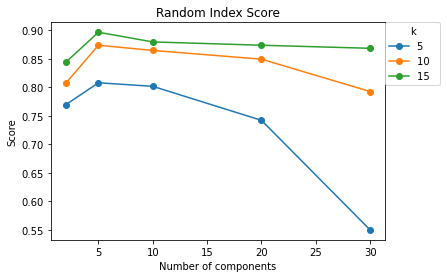

In [17]:
ncut_evaluation.plot_score(save=True, file_name="ncut_score")

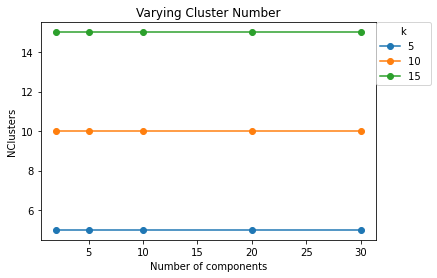

In [18]:
ncut_evaluation.plot_n_clusters(save=True, file_name="ncut_clusters")

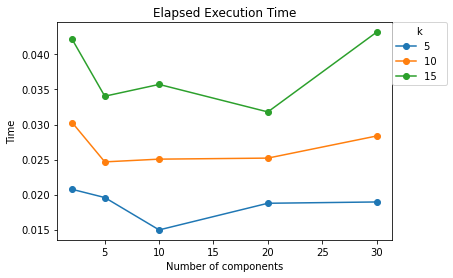

In [19]:
ncut_evaluation.plot_time(save=True, file_name="ncut_exec_time")

## Best model

In [20]:
best = ncut_evaluation.best_model

In [21]:
best

NormalizedCut[N-rows: 70; N-components: 5;  Score: 0.8964803312629399, N-clusters: 15] [K: 15] 

In [22]:
from clustering.model.model import DataClusterSplit

clusters = DataClusterSplit(data=data, index=best.out)

In [23]:
clusters

ClusterDataSplit [Data: 70, Clusters: 15, Mean-per-Cluster: 4.667, Score: 0.896] 

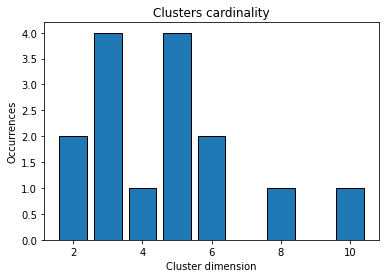

In [24]:
clusters.plot_frequencies_histo()

[Mode 6: {6: 6}] 


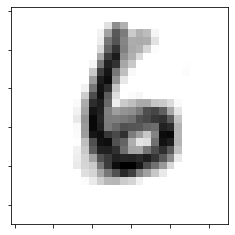

[Mode 1: {1: 6, 8: 2, 6: 1, 5: 1}] 


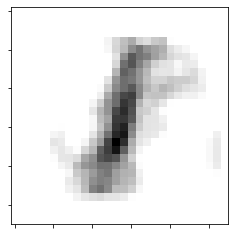

[Mode 7: {7: 4, 9: 1}] 


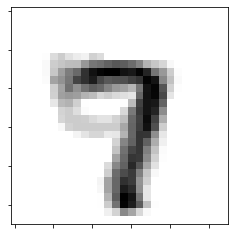

[Mode 2: {2: 2, 6: 2, 0: 1}] 


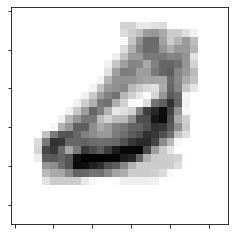

[Mode 0: {0: 3}] 


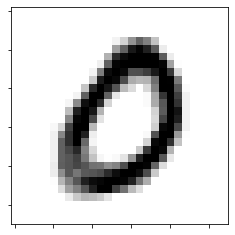

[Mode 3: {3: 5, 8: 2, 5: 1}] 


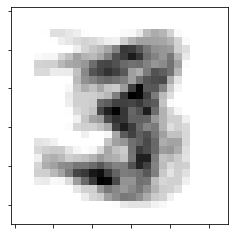

[Mode 9: {9: 4, 7: 1}] 


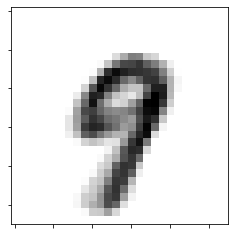

[Mode 5: {5: 2, 3: 1, 8: 1}] 


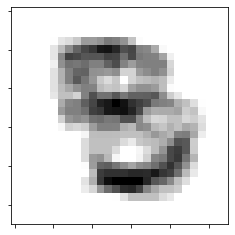

[Mode 0: {0: 3}] 


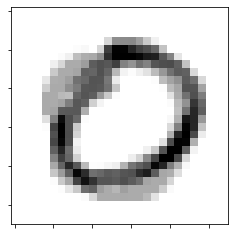

[Mode 5: {5: 3, 3: 2}] 


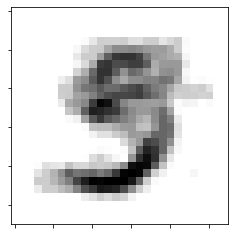

[Mode 7: {7: 4, 5: 1, 9: 1}] 


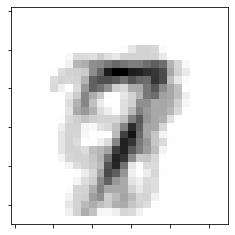

[Mode 0: {0: 3}] 


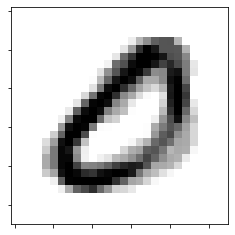

[Mode 2: {2: 1, 4: 1}] 


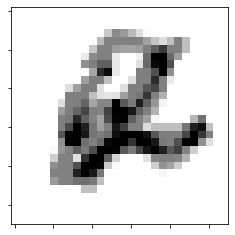

[Mode 2: {2: 3}] 


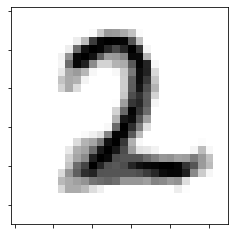

[Mode 6: {6: 2}] 


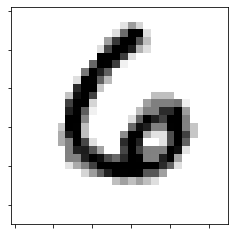

In [25]:
clusters.plot_mean_digit()